In [3]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\mlech\pip_projects\movie-sentiment-analyzer\notebooks


Going into the directory paths and pulling out the positive and negative reviews into a pandas dataframe.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load reviews from a directory
def load_imdb_data(data_dir):
    data = {"review": [], "label": []}
    
    for label in ["pos", "neg"]:
        folder_path = os.path.join(data_dir, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, encoding="utf-8") as f:
                data["review"].append(f.read())
                data["label"].append(1 if label == "pos" else 0)
    
    return pd.DataFrame(data)

# Load the training set
train_df = load_imdb_data("../data/raw/aclImdb/train")

# Preview
print(train_df.shape)
train_df.head()

(25000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


# Light EDA

### Distribution

label
1    12500
0    12500
Name: count, dtype: int64

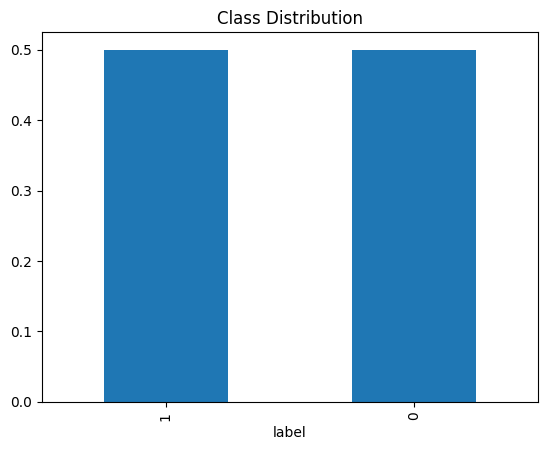

In [11]:
train_df['label'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')

train_df['label'].value_counts()


### Distribution of lengths of reviews

In [20]:
max(train_df['review_length']), train_df['review_length'].mean()

(13704, np.float64(1325.06964))

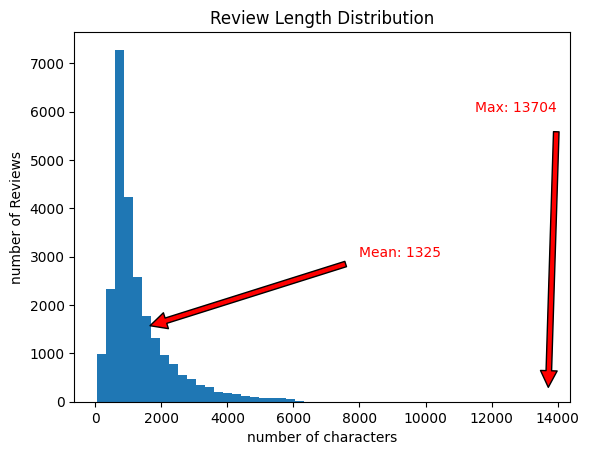

In [38]:
max_len = train_df['review_length'].max()
mean_len = int(train_df['review_length'].mean())

train_df['review_length'] = train_df['review'].str.len()
ax_length = train_df['review_length'].plot(kind='hist', bins=50, title='Review Length Distribution')

ax_length.annotate(f'Max: {max_len}', xy = (max_len, 0), xytext = (11500, 6000), arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
ax_length.annotate(f'Mean: {mean_len}', xy = (mean_len, 1500), xytext = (8000, 3000), arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.xlabel("number of characters")
plt.ylabel("number of Reviews")
plt.show()

### Distribution of word count per review

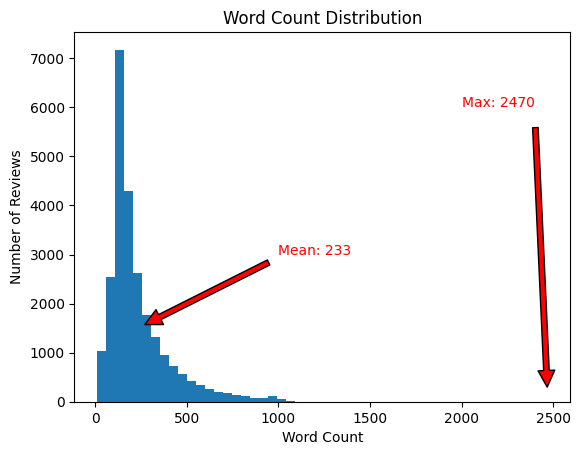

In [41]:
max_count = train_df['word_count'].max()
mean_count = int(train_df['word_count'].mean())

train_df['word_count'] = train_df['review'].str.split().apply(len)
ax_count = train_df['word_count'].plot(kind='hist', bins=50, title='Word Count Distribution')

ax_count.annotate(f'Max: {max_count}', xy = (max_count, 0), xytext = (2000, 6000), arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
ax_count.annotate(f'Mean: {mean_count}', xy = (mean_count, 1500), xytext = (1000, 3000), arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.show()



### Basic Sample Check

In [14]:
train_df['review'].sample(5).values


array(['If you are expecting to see a lot in the bath of Alt&#305;oklar, as it is promised by the tag line, you will be very disappointed to see that the movie consists of nothing but the populist style of Alt&#305;oklar regarding most famous issues like sex, marriage and cheating. To much nudity, which seems to appear from nowhere and has no connection or whatsoever to the plot proves that Alt&#305;oklar was unsuccessfully to "try something new" as he has quoted. To much sex centered jokes seems to show that Alt&#305;oklar had fallen for the famous saying which is "sex sells." I was hoping to see a very good story told with a very good narration technique. However in the end I found myself sitting down for 90 minutes and watching Alt&#305;oklar\'s experimental yet still to much focused on popularism work.',
       'Chris Rock deserves better than he gives himself in "Down To Earth." As directed by brothers Chris & Paul Weitz of "American Pie" fame, this uninspired remake of Warren Bea